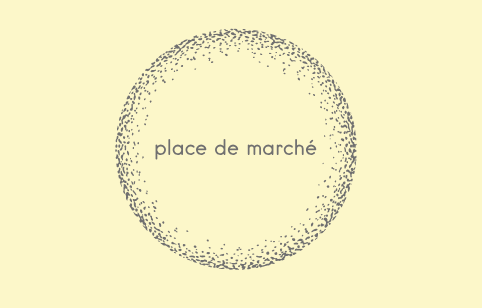

**The Edamam API could not be tested as it requires the provision of credit card details in addition to user registration details in breach of the GDPR (US-based API requiring the collection of irrelevant user information such as home address, date of birth etc... to allow access).**

# 1 - Import libraries & packages

In [3]:
import csv
import json
import requests
import pandas as pd
from urllib.parse import urlencode
from IPython.display import Image, display, HTML

# set dataframe display options
# pd.set_option('display.float_format', lambda x: '%.3f' % x) # Suppress scientific notation and show only 3 decimals
pd.set_option('display.float_format', lambda x: '%.f' % x) # Suppress scientific notation and show only integer part
pd.set_option('max_colwidth', None)
pd.set_option('display.max_columns', None)

# 2 - Collect data from openfoodfacts.org API

See https://openfoodfacts.github.io/openfoodfacts-server/api/how-to-download-images/ for API dox

In [4]:
# Configure API request
base_url = "https://world.openfoodfacts.org/cgi/search.pl"
params = {"search_terms": "champagne",
          "json": 1,
          "page_size": 10,
          "fields": "code, product_name, categories, ingredients_text, image_url"
         }

# Send request
response = requests.get(f"{base_url}?{urlencode(params)}")
data = response.json()

# Extract products
products = data.get("products", [])[:10]

# Create csv file
csv_columns = ['foodId', 'label', 'category', 'foodContentsLabel', 'image']
csv_file = "champagne_products.csv"

with open(csv_file, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=csv_columns, delimiter=';')
    writer.writeheader()
    
    for product in products:
        # Build url of alternative image if required
        image_url = product.get('image_url') or \
                   f"https://images.openfoodfacts.org/images/products/{product.get('code')}.jpg"
        
        writer.writerow({
            'foodId': product.get('code', 'N/A'),
            'label': product.get('product_name', 'no name'),
            'category': product.get('categories', '').split(',')[0] if product.get('categories') else 'no category',
            'foodContentsLabel': product.get('ingredients_text', 'information unavailable').replace('\n', ' '),
            'image': image_url
        })

print(f"Export successful : {len(products)} products saved to {csv_file}.")

Export successful : 10 products saved to champagne_products.csv.


In [6]:
# Load CSV file
champagne_products = pd.read_csv('champagne_products.csv', encoding='latin-1')

# Display thumbnails for top 10 rows
html = '<div style="display: flex; flex-wrap: wrap; max-width: 550px;">'

for i, img_url in enumerate(champagne_products['image'].head(10)):
    html += f'''
    <div style="flex: 1 0 20%; padding: 5px; box-sizing: border-box; text-align: center;">
        <img src="{img_url}" width="100" height="100" style="object-fit: contain;"/>
    </div>
    '''
html += '</div>'

display(HTML(html))

**Careful : results show products that contain champagne as an ingredient or as a region of origin of an ingredient, as well as some random mistakes, which are unavoidable with this API given the community contribution process through which data is collected; photos are posted by users through community contributions and labelling errors do happen due to the absence of curation of the image library. For the purpose of implementing this projet into production, it would be worth considering the acquisition of this information through a properly curated library (possibly through a paid subscription such as https://platform.fatsecret.com/api-demo#food-api).**